<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-01-15 05:12:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  61.3MB/s    in 3.3s    

2026-01-15 05:12:27 (60.7 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


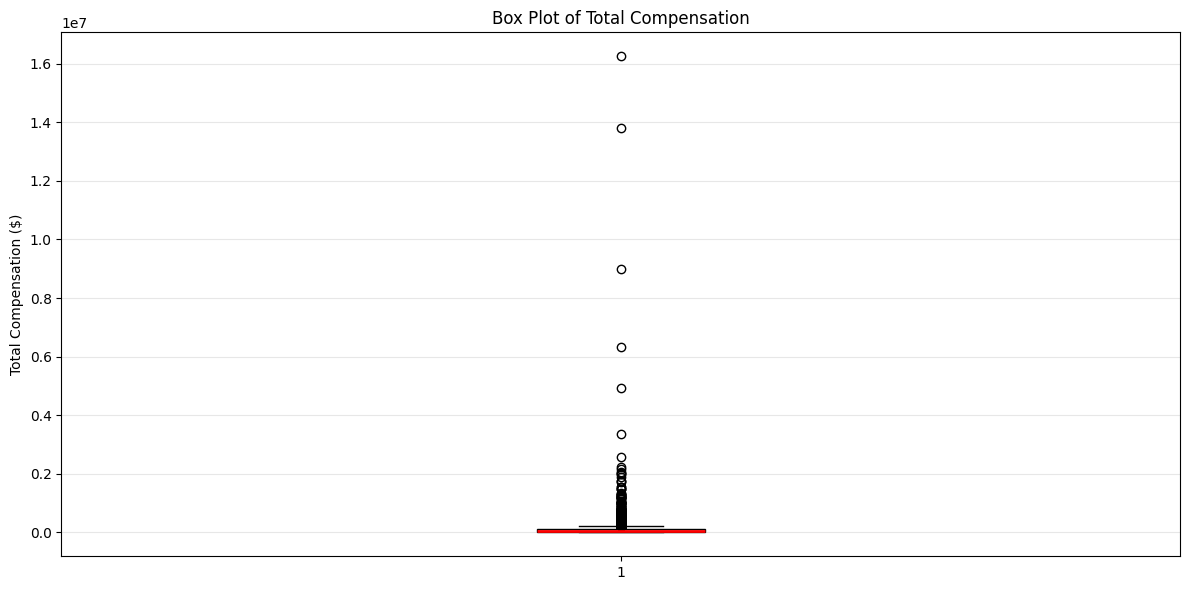


Compensation Statistics:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: CompTotal, dtype: float64


In [8]:
# Use a box plot to analyze the distribution and outliers in total compensation
QUERY = """
SELECT ConvertedCompYearly as CompTotal
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""

df_comp = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12, 6))
plt.boxplot(df_comp['CompTotal'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red', linewidth=2))
plt.title('Box Plot of Total Compensation')
plt.ylabel('Total Compensation ($)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nCompensation Statistics:")
print(df_comp['CompTotal'].describe())


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [ ]:
# your code goes here
# Convert the Age column into numerical values and visualize the distribution
QUERY = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
"""

df_age = pd.read_sql_query(QUERY, conn)

# Map Age ranges to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 65
}

df_age['Age_Numeric'] = df_age['Age'].map(age_mapping)

plt.figure(figsize=(10, 6))
plt.boxplot(df_age['Age_Numeric'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red', linewidth=2))
plt.title('Box Plot of Age Distribution')
plt.ylabel('Age (Numeric Representation)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nAge Statistics:")
print(df_age['Age_Numeric'].describe())

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [ ]:
# Visualize the distribution of compensation across different age groups
QUERY = """
SELECT Age, ConvertedCompYearly as CompTotal
FROM main
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""

df_age_comp = pd.read_sql_query(QUERY, conn)

# Prepare data for grouped box plot
age_groups = sorted(df_age_comp['Age'].unique())
comp_by_age = [df_age_comp[df_age_comp['Age'] == age]['CompTotal'].values for age in age_groups]

plt.figure(figsize=(14, 6))
bp = plt.boxplot(comp_by_age, labels=age_groups, patch_artist=True)

# Color the boxes
for patch in bp['boxes']:
    patch.set_facecolor('skyblue')

plt.title('Compensation Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display median for each age group
print("\nMedian Compensation by Age Group:")
for age in age_groups:
    median = df_age_comp[df_age_comp['Age'] == age]['CompTotal'].median()
    print(f"{age}: ${median:,.2f}")

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [ ]:
# Examine how compensation varies based on job satisfaction levels
QUERY = """
SELECT JobSat, ConvertedCompYearly as CompTotal
FROM main
WHERE JobSat IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""

df_jobsat_comp = pd.read_sql_query(QUERY, conn)

# Convert JobSat to numeric
df_jobsat_comp['JobSat_Numeric'] = pd.to_numeric(df_jobsat_comp['JobSat'], errors='coerce')
df_jobsat_comp = df_jobsat_comp.dropna(subset=['JobSat_Numeric'])

# Prepare data for grouped box plot
jobsat_levels = sorted(df_jobsat_comp['JobSat_Numeric'].unique())
comp_by_jobsat = [df_jobsat_comp[df_jobsat_comp['JobSat_Numeric'] == level]['CompTotal'].values 
                  for level in jobsat_levels]

plt.figure(figsize=(14, 6))
bp = plt.boxplot(comp_by_jobsat, labels=[int(x) for x in jobsat_levels], patch_artist=True)

# Color the boxes
for patch in bp['boxes']:
    patch.set_facecolor('lightcoral')

plt.title('Compensation Distribution by Job Satisfaction Level')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Total Compensation ($)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display median for each satisfaction level
print("\nMedian Compensation by Job Satisfaction:")
for level in jobsat_levels:
    median = df_jobsat_comp[df_jobsat_comp['JobSat_Numeric'] == level]['CompTotal'].median()
    print(f"Level {int(level)}: ${median:,.2f}")

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [ ]:
# Analyze compensation across the top 5 developer roles
QUERY = """
SELECT DevType, ConvertedCompYearly as CompTotal
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""

df_devtype = pd.read_sql_query(QUERY, conn)

# Get top 5 developer types by count
top_devtypes = df_devtype['DevType'].value_counts().head(5).index

# Filter for top 5
df_top_devtypes = df_devtype[df_devtype['DevType'].isin(top_devtypes)]

# Prepare data for box plot
comp_by_devtype = [df_top_devtypes[df_top_devtypes['DevType'] == dt]['CompTotal'].values 
                   for dt in top_devtypes]

plt.figure(figsize=(14, 6))
bp = plt.boxplot(comp_by_devtype, labels=top_devtypes, patch_artist=True)

# Color the boxes
for patch in bp['boxes']:
    patch.set_facecolor('lightyellow')

plt.title('Compensation Distribution for Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Compensation ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 5 Developer Types:")
for dt in top_devtypes:
    count = len(df_top_devtypes[df_top_devtypes['DevType'] == dt])
    median = df_top_devtypes[df_top_devtypes['DevType'] == dt]['CompTotal'].median()
    print(f"{dt}: {count} respondents, Median: ${median:,.2f}")

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [ ]:
# Analyze compensation across respondents from the top 5 countries
QUERY = """
SELECT Country, ConvertedCompYearly as CompTotal
FROM main
WHERE Country IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""

df_country = pd.read_sql_query(QUERY, conn)

# Get top 5 countries by count
top_countries = df_country['Country'].value_counts().head(5).index

# Filter for top 5
df_top_countries = df_country[df_country['Country'].isin(top_countries)]

# Prepare data for box plot
comp_by_country = [df_top_countries[df_top_countries['Country'] == country]['CompTotal'].values 
                   for country in top_countries]

plt.figure(figsize=(14, 6))
bp = plt.boxplot(comp_by_country, labels=top_countries, patch_artist=True)

# Color the boxes
for patch in bp['boxes']:
    patch.set_facecolor('lightgreen')

plt.title('Compensation Distribution for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Compensation ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 5 Countries:")
for country in top_countries:
    count = len(df_top_countries[df_top_countries['Country'] == country])
    median = df_top_countries[df_top_countries['Country'] == country]['CompTotal'].median()
    print(f"{country}: {count} respondents, Median: ${median:,.2f}")

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [ ]:
# Analyze compensation for different employment types
QUERY = """
SELECT Employment, ConvertedCompYearly as CompTotal
FROM main
WHERE Employment IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""

df_employment = pd.read_sql_query(QUERY, conn)

# Get employment types
employment_types = df_employment['Employment'].unique()

# Prepare data for box plot
comp_by_employment = [df_employment[df_employment['Employment'] == emp]['CompTotal'].values 
                      for emp in employment_types]

plt.figure(figsize=(14, 6))
bp = plt.boxplot(comp_by_employment, labels=employment_types, patch_artist=True)

# Color the boxes
for patch in bp['boxes']:
    patch.set_facecolor('plum')

plt.title('Compensation Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Compensation ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nCompensation by Employment Type:")
for emp in employment_types:
    count = len(df_employment[df_employment['Employment'] == emp])
    median = df_employment[df_employment['Employment'] == emp]['CompTotal'].median()
    print(f"{emp}: {count} respondents, Median: ${median:,.2f}")

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
# Examine the distribution of professional coding years by job satisfaction levels
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
"""

df_exp_jobsat = pd.read_sql_query(QUERY, conn)

# Convert to numeric
df_exp_jobsat['JobSat_Numeric'] = pd.to_numeric(df_exp_jobsat['JobSat'], errors='coerce')
df_exp_jobsat['YearsCodePro_Numeric'] = pd.to_numeric(df_exp_jobsat['YearsCodePro'], errors='coerce')
df_exp_jobsat = df_exp_jobsat.dropna()

# Prepare data for box plot
jobsat_levels = sorted(df_exp_jobsat['JobSat_Numeric'].unique())
exp_by_jobsat = [df_exp_jobsat[df_exp_jobsat['JobSat_Numeric'] == level]['YearsCodePro_Numeric'].values 
                 for level in jobsat_levels]

plt.figure(figsize=(14, 6))
bp = plt.boxplot(exp_by_jobsat, labels=[int(x) for x in jobsat_levels], patch_artist=True)

# Color the boxes
for patch in bp['boxes']:
    patch.set_facecolor('peachpuff')

plt.title('Years of Coding Experience by Job Satisfaction Level')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nExperience by Job Satisfaction:")
for level in jobsat_levels:
    median = df_exp_jobsat[df_exp_jobsat['JobSat_Numeric'] == level]['YearsCodePro_Numeric'].median()
    print(f"Level {int(level)}: Median {median:.1f} years")

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
